# Job Description Analyser Project

This notebook analyses job descriptions to extract key skills using NLP.

## Objectives:
- Parse and clean job description text
- Identify in-demand skills
- Match skills with a candidate CV

## 📄 Job Description 1: Data Scientist

We are looking for a Data Scientist with experience in Python, SQL, machine learning, and AWS.  
Strong communication skills and teamwork are essential.  
You will work cross-functionally with product and engineering teams to improve decision-making through data.

---

## 📄 Job Description 2: Machine Learning Engineer

We are hiring a Machine Learning Engineer to design, develop, and deploy scalable ML solutions.  
You will work with large datasets and build predictive models using TensorFlow and PyTorch.  
Experience with cloud services like AWS/GCP is required.  

Responsibilities:
- Model training, tuning, and evaluation  
- Production-level deployment of ML pipelines  
- Working with MLOps frameworks and cross-functional teams

---

## 📄 Job Description 3: AI Analyst

As an AI Analyst, you will analyze complex digital data to improve operational efficiency.  
You will apply machine learning and statistical methods to extract actionable insights.  
Strong communication and problem-solving skills are required.  

Tools: Python, Tableau, SQL, Power BI, scikit-learn.

---

## 📄 Job Description 4: AI Data Quality Analyst

We’re looking for an AI Data Quality Analyst to ensure the accuracy, cleanliness, and structure of data used in machine learning models.  
You will work on large, unstructured datasets and detect bias, missing data, or inconsistencies.  
Experience with SQL, data validation tools, and Python is essential.  

Bonus if familiar with AWS/GCP and compliance regulations.

In [33]:
# Install spaCy if needed (uncomment below line if not already installed)
# !pip install spacy

# Download the English language model properly in the Jupyter environment
import spacy.cli
spacy.cli.download("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 15.3 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [35]:
import spacy
from collections import Counter

# Load the small English model
nlp = spacy.load("en_core_web_sm")

In [37]:
def extract_skills(text, skills_list):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    matched = [skill for skill in skills_list if skill in tokens]
    return Counter(matched)

In [39]:
skills_list = [
    "python", "sql", "machine learning", "aws", "gcp", "communication", "teamwork",
    "tensorflow", "pytorch", "tableau", "power bi", "data analysis", "nlp",
    "statistics", "scikit-learn", "mlops", "data validation"
]

In [41]:
job_descriptions = [
    """We are looking for a Data Scientist with experience in Python, SQL, machine learning, and AWS.
    Strong communication skills and teamwork are essential. You will work cross-functionally with product and engineering teams to improve decision-making through data.""",

    """We are hiring a Machine Learning Engineer to design, develop, and deploy scalable ML solutions.
    You will work with large datasets and build predictive models using TensorFlow and PyTorch.
    Experience with cloud services like AWS/GCP is required.""",

    """As an AI Analyst, you will analyze complex digital data to improve operational efficiency.
    You will apply machine learning and statistical methods to extract actionable insights.
    Strong communication and problem-solving skills are required.
    Tools: Python, Tableau, SQL, Power BI, scikit-learn.""",

    """We’re looking for an AI Data Quality Analyst to ensure the accuracy, cleanliness, and structure of data used in machine learning models.
    You will work on large, unstructured datasets and detect bias, missing data, or inconsistencies.
    Experience with SQL, data validation tools, and Python is essential.
    Bonus if familiar with AWS/GCP and compliance regulations."""
]

In [43]:
for idx, jd in enumerate(job_descriptions, 1):
    print(f"\n🔍 Job Description {idx}:")
    skills_found = extract_skills(jd, skills_list)
    top_skills = skills_found.most_common(5)
    for skill, count in top_skills:
        print(f"  • {skill} ({count})")


🔍 Job Description 1:
  • python (1)
  • sql (1)
  • communication (1)
  • teamwork (1)

🔍 Job Description 2:
  • aws (1)
  • gcp (1)
  • tensorflow (1)
  • pytorch (1)

🔍 Job Description 3:
  • python (1)
  • sql (1)
  • communication (1)
  • tableau (1)

🔍 Job Description 4:
  • python (1)
  • sql (1)
  • gcp (1)


In [45]:
# Install WordCloud if not installed already
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 9.1 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


🔍 Word Cloud for Job Description 1


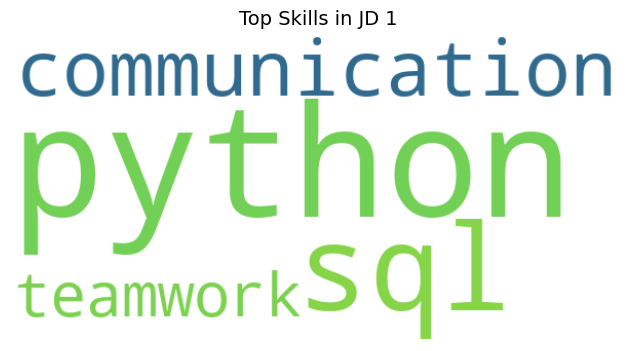


🔍 Word Cloud for Job Description 2


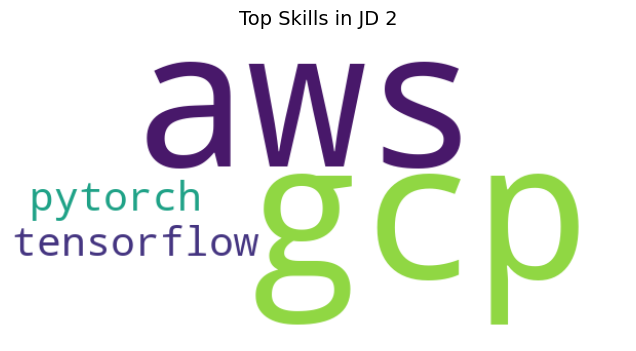


🔍 Word Cloud for Job Description 3


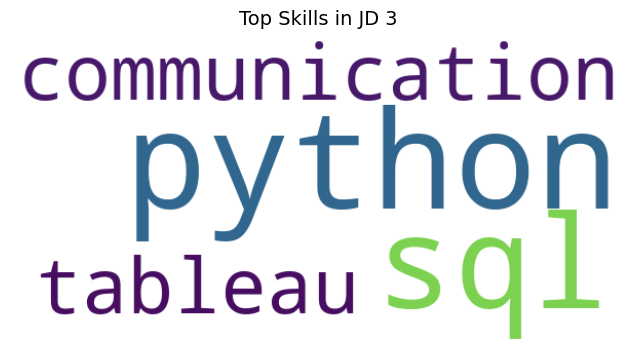


🔍 Word Cloud for Job Description 4


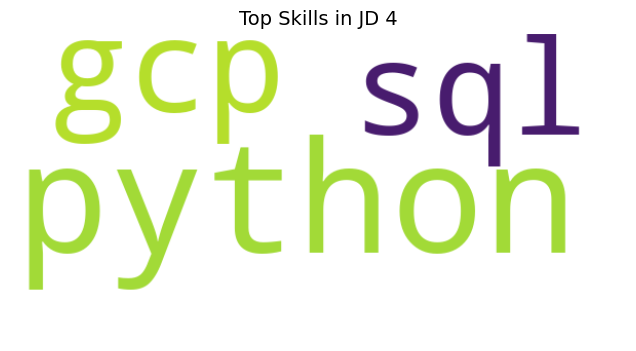

In [49]:
for idx, jd in enumerate(job_descriptions, 1):
    skills_found = extract_skills(jd, skills_list)
    
    print(f"\n🔍 Word Cloud for Job Description {idx}")
    wordcloud = WordCloud(width=600, height=300, background_color='white') \
                    .generate_from_frequencies(skills_found)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Top Skills in JD {idx}", fontsize=14)
    plt.show()

In [51]:
cv_text = """
Experienced Data Analyst with expertise in Python, SQL, and Tableau.
Worked with AWS and Power BI to create automated dashboards.
Strong communication skills and a collaborative mindset.
Interested in machine learning and data-driven decision making.
"""

cv_skills = extract_skills(cv_text, skills_list)
print("📄 Extracted Skills from CV:")
print(cv_skills)

📄 Extracted Skills from CV:
Counter({'python': 1, 'sql': 1, 'communication': 1, 'tableau': 1})


In [53]:
def calculate_match(jd_skills, cv_skills):
    jd_set = set(jd_skills.keys())
    cv_set = set(cv_skills.keys())
    overlap = jd_set & cv_set
    if not jd_set:
        return 0
    match_pct = len(overlap) / len(jd_set) * 100
    return round(match_pct, 2), overlap

for idx, jd in enumerate(job_descriptions, 1):
    jd_skills = extract_skills(jd, skills_list)
    match_pct, matched = calculate_match(jd_skills, cv_skills)
    print(f"\n🧾 JD {idx} Match: {match_pct}%")
    print(f"Matched Skills: {', '.join(matched) if matched else 'None'}")


🧾 JD 1 Match: 75.0%
Matched Skills: python, sql, communication

🧾 JD 2 Match: 0.0%
Matched Skills: None

🧾 JD 3 Match: 100.0%
Matched Skills: python, tableau, sql, communication

🧾 JD 4 Match: 66.67%
Matched Skills: python, sql
